In [7]:
import os
import json
import random
from functools import partial

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from PIL import Image

import cv2

from sklearn.experimental import enable_halving_search_cv

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.model_selection import (train_test_split,cross_val_predict,cross_val_score
                                     ,RandomizedSearchCV,GridSearchCV,HalvingGridSearchCV,HalvingRandomSearchCV)
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.metrics import (f1_score,precision_recall_curve,precision_score
                             ,recall_score,ConfusionMatrixDisplay,accuracy_score)

from plyer import notification
from discord import SyncWebhook


import imgaug.augmenters as imaug

import tensorflow as tf


In [8]:
def alert(data="Execution Completed"):
    notification.notify(
    title = "Python",
    message = data,
    timeout = 10
    )
    

In [9]:
test_dir = "dataset/test/"
train_dir = "dataset/train/"

classes = os.listdir(train_dir)
classes

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [10]:
def augument(data):
    final_img = []
    
    final_img.append(data)
    
    augmentation = imaug.Sequential([
        imaug.Affine(translate_percent={"x": (0.45, -0.45), "y": (-0.2, 0.2)},scale=(0.8,0.8)),
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])

    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
        imaug.Fliplr(1)
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    # augmentation = imaug.Sequential([
    #     imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
    #     imaug.Fliplr(1),
    #     imaug.Flipud(1)
        
    # ])
    # a = augmentation(images = [data])
    # final_img.append(a[0])
    
    # augmentation = imaug.Sequential([
    #     imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
    #     imaug.Fliplr(0),
    #     imaug.Flipud(1)
        
    # ])
    # a = augmentation(images = [data])
    # final_img.append(a[0])
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8)),
        
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    
    # augmentation = imaug.Sequential([
    #     imaug.Affine(scale=(0.8, 0.8)),
    #     imaug.Flipud(1),
    #     imaug.Fliplr(1),
    # ])
    # a = augmentation(images = [data])
    # final_img.append(a[0])
        
    
    return final_img

In [11]:
x_train = []
y_train = []

encoded_classes = [i for i in range(len(classes))]


count = 0
inc_count = 0

for i in range(len(classes)):
    datalist = os.listdir(train_dir+classes[i])
    
    if (len(datalist) > 500):
        rand = random.sample(range(0,len(datalist)),500)
        
    for j in datalist:
        data = np.asarray(Image.open(train_dir+classes[i]+"/"+j))
        if (i==1):   
            aug_data = augument(data)
            for k in aug_data:
                data_norm = cv2.normalize(k,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
                x_train.append(data_norm)
                y_train.append(encoded_classes[i])
                count += 1
                
        elif (i in [0,2]):
            if (inc_count not in rand):
                data_norm = cv2.normalize(data,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
                x_train.append(data_norm)
                y_train.append(encoded_classes[i])
                count += 1
                inc_count += 1
                
            else:
                augmentation = imaug.Sequential([
                    imaug.Affine(scale=(0.8, 0.8)),
                    
                ])
                aug_data = augmentation(images = [data])
                
                for k in aug_data:
                    data_norm = cv2.normalize(k,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
                    x_train.append(data_norm)
                    y_train.append(encoded_classes[i])
                    count += 1
                    inc_count += 1      
                
        else:
            data_norm = cv2.normalize(data,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
            x_train.append(data_norm)
            y_train.append(encoded_classes[i])
            count += 1
            
            
    print({classes[i]: count})
    count = 0
    inc_count = 0

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)


{'angry': 3995}
{'disgusted': 2180}
{'fearful': 4097}
{'happy': 7215}
{'neutral': 4965}
{'sad': 4830}
{'surprised': 3171}
(30453, 48, 48)


In [12]:
def image_show(img):
    data = img
    plt.imshow(cv2.cvtColor(data,cv2.COLOR_BGR2RGB))
    plt.show()

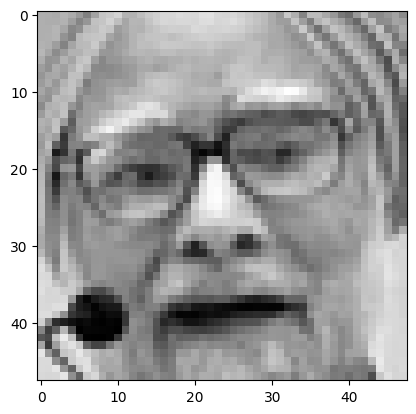

1324


In [13]:
image_show(x_train[1])
print(x_train[0].argmax())

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27407, 48, 48)
(27407,)
(3046, 48, 48)
(3046,)


In [16]:
# webhook = SyncWebhook.from_url("https://discord.com/api/webhooks/1063122746835472466/QWFwQkRFXRtRLa0j21nvMl2D7qQooBs3OiAun2SEwlwSFf0UegILx4SXKxKQ_Gq7FjEr")
# webhook.send(f"Execution Complete => Precision_score - {pres_score}")

# alert(f"Execution Complete => Precision_score - {pres_score}")

In [17]:
# for i in range(len(classes)):
#     datalist = os.listdir(train_dir+classes[i])
#     for j in datalist:
#         count += 1
#     # print({classes[i]: count})
#     # count = 0
    
# print(count)
        

In [18]:
print(classes)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [19]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape = [48,48]),

#     tf.keras.layers.Dense(400,activation="elu",kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(rate=0.3),
    
#     tf.keras.layers.Dense(300,activation="elu",kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(rate=0.3),
    
#     tf.keras.layers.Dense(200,activation="elu",kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(rate=0.3),
    
#     tf.keras.layers.Dense(7,activation="softmax")
# ])

In [21]:
ConvLayer = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", 
                    activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    
    ConvLayer(filters=64,kernel_size=7,input_shape=[48,48,1]),
    tf.keras.layers.MaxPool2D(),
    
    ConvLayer(filters=128),
    ConvLayer(filters=128),
    tf.keras.layers.MaxPool2D(),
    
    ConvLayer(filters=256),
    ConvLayer(filters=256),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(units=7, activation="softmax")

])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        3200      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 256)      

In [23]:
# optimizers = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam" ,metrics=["accuracy"])

In [24]:
history = model.fit(x_train,y_train,epochs=30,validation_split=0.05)

Epoch 1/30
814/814 [==============================] - 212s 258ms/step - loss: 1.7598 - accuracy: 0.2850 - val_loss: 1.5731 - val_accuracy: 0.3705
Epoch 2/30
814/814 [==============================] - 209s 256ms/step - loss: 1.5611 - accuracy: 0.3853 - val_loss: 1.4307 - val_accuracy: 0.4340
Epoch 3/30
814/814 [==============================] - 205s 252ms/step - loss: 1.4426 - accuracy: 0.4367 - val_loss: 1.3790 - val_accuracy: 0.4551
Epoch 4/30
814/814 [==============================] - 201s 246ms/step - loss: 1.3709 - accuracy: 0.4677 - val_loss: 1.2994 - val_accuracy: 0.4792
Epoch 5/30
814/814 [==============================] - 207s 255ms/step - loss: 1.3073 - accuracy: 0.4948 - val_loss: 1.2687 - val_accuracy: 0.5040
Epoch 6/30
814/814 [==============================] - 210s 258ms/step - loss: 1.2479 - accuracy: 0.5132 - val_loss: 1.2230 - val_accuracy: 0.5179
Epoch 7/30
814/814 [==============================] - 203s 249ms/step - loss: 1.1983 - accuracy: 0.5389 - val_loss: 1.2158 -

KeyboardInterrupt: 

In [ ]:
alert()

In [ ]:
classes

In [ ]:
inp = 357

print(model.predict(x_test[inp:inp+1]))
print(classes[model.predict(x_test[inp:inp+1])[0].argmax()])
print(classes[y_test[inp]])
image_show(x_test[inp])


In [ ]:
predkt = model.predict(x_test)

In [ ]:
final_pred = []
for i in predkt:
    final_pred.append(i.argmax())
    
print(final_pred[:10])


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,np.array(final_pred),values_format='.0%',normalize='true')
plt.show()
print(pd.DataFrame([classes]))